# 8. PythonでFFT

## サンプルコード

Text(0.5, 0, 'time')

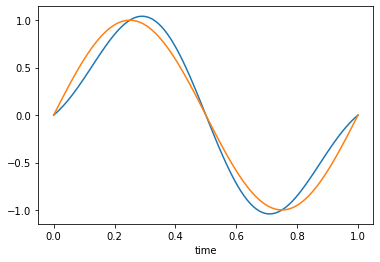

In [4]:
# 8.1
import numpy as np
import matplotlib.pyplot as plt

PI = np.pi
fs = 4  # sampling frequency
time = np.linspace(0, 1, 100)


def SF(time):
    ps = 0
    t = np.linspace(0, 1, fs + 1)  # sampling points
    for k in range(0, len(t)):
        ps += np.sin(2 * PI * t[k]) * np.sinc(fs * (time - t[k]))
    return ps


plt.plot(time, SF(time))
plt.plot(time, np.sin(2 * PI * time))
plt.xlabel("time")

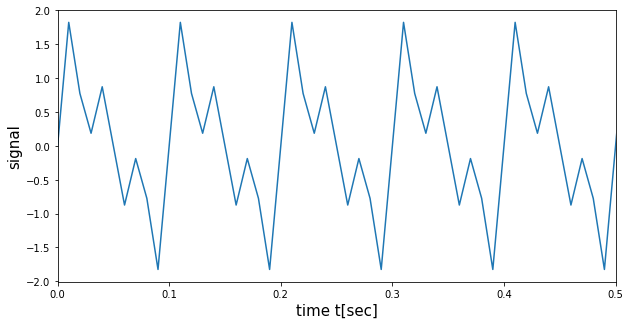

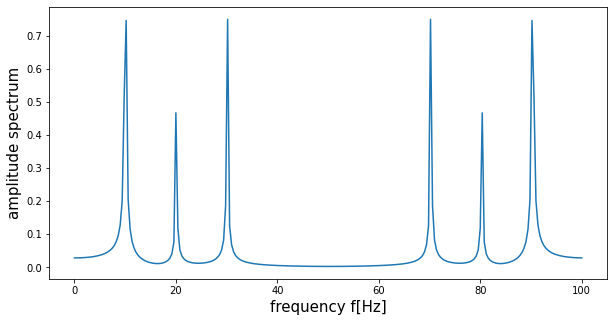

In [3]:
# 8.2
import numpy as np
import matplotlib.pyplot as plt

N = 2 ** 8  # number of sample points
fs = 100  # sampling frequency[Hz]
T = 1 / fs  # sampling period[sec]
PI = np.pi
# frequencies[Hz]
f1 = 10
f2 = 20
f3 = 30
# amplitudes
A1 = 1
A2 = 0.5
A3 = 0.8
# time
t = np.arange(0, N * T, T)
# signal
x = (
    A1 * np.sin(2 * PI * f1 * t)
    + A2 * np.sin(2 * PI * f2 * t)
    + A3 * np.sin(2 * PI * f3 * t)
)

fig = plt.figure(figsize=(10, 5))
plt.xlabel("time t[sec]", fontsize=15)
plt.ylabel("signal", fontsize=15)
plt.xlim(0, 0.5)
plt.plot(t, x)

# FFT
F = np.fft.fft(x)

# amplifier
amp = 2 * np.abs(F) / N
# frequency
freq = np.linspace(0, fs, N)

fig = plt.figure(figsize=(10, 5))
plt.xlabel("frequency f[Hz]", fontsize=15)
plt.ylabel("amplitude spectrum", fontsize=15)
plt.plot(freq, amp)
plt.show()


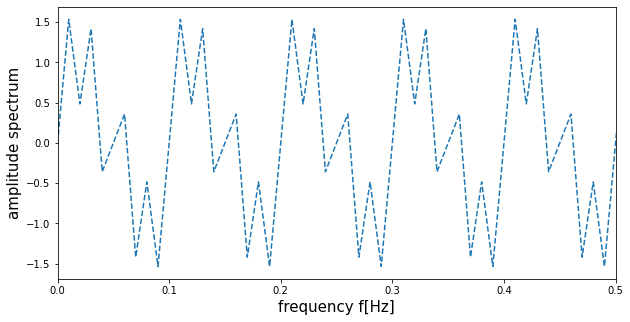

In [8]:
# 8.3
import numpy as np
import matplotlib.pyplot as plt

N = 2 ** 8  #  number of sample points
fs = 100  # sampling frequency[Hz]
T = 1 / fs  # sampling period[sec]
PI = np.pi
# frequencies[Hz]
f1 = 10
f2 = 20
f3 = 40
# amplitudes
A1 = 1
A2 = 0.5
A3 = 0.8
# time
t = np.arange(0, N * T, T)
# signal
x = (
    A1 * np.sin(2 * PI * f1 * t)
    + A2 * np.sin(2 * PI * f2 * t)
    + A3 * np.sin(2 * PI * f3 * t)
)

fig = plt.figure(figsize=(10, 5))
plt.xlabel("frequency f[Hz]", fontsize=15)
plt.ylabel("amplitude spectrum", fontsize=15)
plt.xlim(0, 0.5)

# FFT
F = np.fft.fft(x)

# Inverse Discrete Fourier Transform
y = np.fft.ifft(F)
plt.plot(t, y.real, linestyle="dashed")


In [9]:
# 8.4
import numpy as np

PI = np.pi


def my_fft(x):
    N = x.shape[0]  # must be an integer power of two
    assert N != 0 and N & (N - 1) == 0
    hatx = np.zeros(N, dtype="complex")
    k = np.arange(0, N / 2)
    W = np.exp(-1j * 2 * PI * k / N)  # roots of 1
    if N == 2:
        # the 1st butterfly operation
        hatx[0] = x[0] + x[1]
        hatx[1] = x[0] - x[1]
        return hatx
    if N >= 4:
        # butterfly operation
        L = my_fft(x[0:N:2])
        R = my_fft(x[1:N:2])
        hatx[0 : N // 2] = L + W * R
        hatx[N // 2 : N] = L - W * R
        return hatx


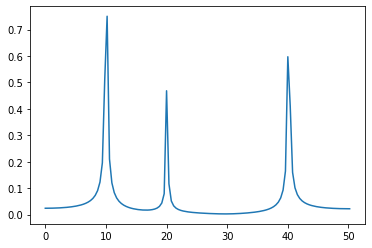

In [11]:
# 8.5
import numpy as np
import matplotlib.pyplot as plt

PI = np.pi


def my_fft(x):
    N = x.shape[0]  # must be an integer power of two
    assert N != 0 and N & (N - 1) == 0
    hatx = np.zeros(N, dtype="complex")
    k = np.arange(0, N / 2)
    W = np.exp(-1j * 2 * PI * k / N)  # roots of 1
    if N == 2:
        # the 1st butterfly operation
        hatx[0] = x[0] + x[1]
        hatx[1] = x[0] - x[1]
        return hatx
    if N >= 4:
        # butterfly operation
        L = my_fft(x[0:N:2])
        R = my_fft(x[1:N:2])
        hatx[0 : N // 2] = L + W * R
        hatx[N // 2 : N] = L - W * R
        return hatx

N = 2 ** 8 # number of sample points
fs = 100 # sampling frequency[Hz]
T = 1 / fs # sampling period[sec]
PI = np.pi
# frequencies[Hz]
f1 = 10
f2 = 20
f3 = 40
# amplitude
A1 = 1
A2 = 0.5
A3 = 0.8
# time
t = np.arange(0, N*T, T)
# signal
x = (
    A1 * np.sin(2 * PI * f1 * t)
    + A2 * np.sin(2 * PI * f2 * t)
    + A3 * np.sin(2 * PI * f3 * t)
)

testF = my_fft(x)
# amplifier
amp = 2 * np.abs(testF) / N
# frequency
freq = np.linspace(0, fs, N)

plt.plot(freq[:N//2 +1], amp[:N//2+1])
plt.show()

## 章末問題

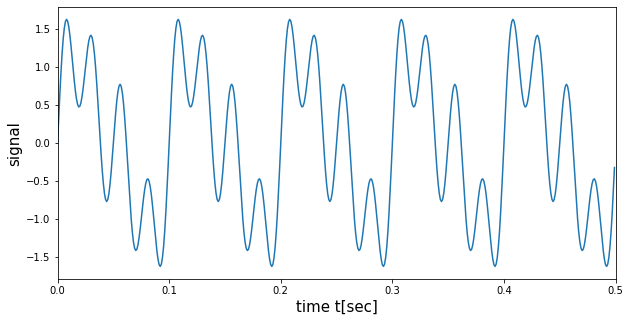

In [13]:
# 8.61
import numpy as np
import matplotlib.pyplot as plt

PI = np.pi
# frequencies[Hz]
f = [10, 20, 40]
# amplitudes
A = [1, 0.5, 0.8]
# time
t = np.arange(0, 0.5, 0.001)
# signal
x = sum([A[i] * np.sin(2 * PI * f[i] * t) for i in range(len(f))])

fig = plt.figure(figsize=(10, 5))
plt.xlabel("time t[sec]", fontsize=15)
plt.ylabel("signal", fontsize=15)
plt.xlim(0, 0.5)
plt.plot(t, x)
plt.show()
